# This notebook tests out xarray use

### multi-dimensional coordiantes example: https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

In [2]:
ds = xr.tutorial.open_dataset("rasm").load()
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan ... 29.8 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

In [3]:
ds.coords

Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51

In [4]:
ds.dims

Frozen(SortedKeysDict({'time': 36, 'y': 205, 'x': 275}))

In [5]:
ds.variables

Frozen({'Tair': <xarray.Variable (time: 36, y: 205, x: 275)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., 27.03290153,
         27.03125761, 27.33531541],
        [        nan,         nan,         nan, ..., 27.2784053 ,
         26.80261869, 27.08603517],
        [        nan,         nan,         nan, ..., 27.02344402,
         26.56473862, 26.73064933]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
  

In [6]:
print(ds.xc.attrs)
print(ds.yc.attrs)

{'long_name': 'longitude of grid cell center', 'units': 'degrees_east'}
{'long_name': 'latitude of grid cell center', 'units': 'degrees_north'}


## examine the coordinate variables

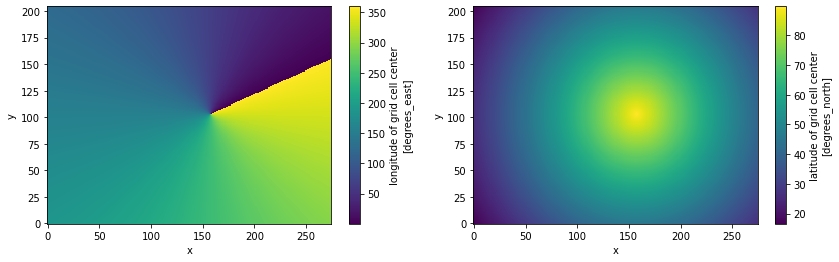

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))
ds.xc.plot(ax=ax1)
ds.yc.plot(ax=ax2)

## plot the data variable

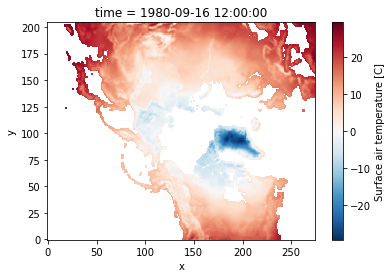

In [8]:
ds.Tair[0].plot()

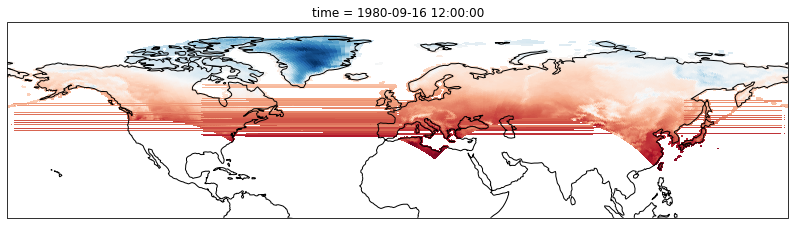

In [10]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.Tair[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="xc", y="yc", add_colorbar=False
)
ax.coastlines()
ax.set_ylim([0, 90]);

## Multi-dimensional groupby

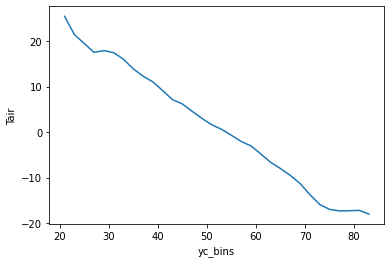

In [11]:
# define two-degree wide latitude bins
lat_bins = np.arange(0, 91, 2)
# define a label for each bin corresponding to the central latitude
lat_center = np.arange(1, 90, 2)
# group according to those bins and take the mean
Tair_lat_mean = ds.Tair.groupby_bins("yc", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
)
# plot the result
Tair_lat_mean.plot()